## An easy math problem Excel gets wrong

In [1]:
-5**2

-25

In [20]:
%pylab inline
from defaults import *
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Make some random data with dates and names to select from

In [56]:
data=pd.DataFrame() # an empty data set
# make up some date strings to deal with
month=1
day=1
year=1900
dates=[]
names=[]
values=[]
for name in ['bob','charlie']:
    for year in [1900,1901,1902]:
        for month in [1,2,3,4,5,6,7,8,9,10,11,12]:

            s='%d-%02d-%02d' % (year,month,day)

            dates.append(s)
            names.append(name)
            if name=='bob':
                values.append(randn())
            else:
                values.append(10*rand())
            
data['dates']=dates
data['values']=values
data['names']=names

In [57]:
data

,dates,values,names
0,1900-01-01,0.318844,bob
1,1900-02-01,-0.416916,bob
2,1900-03-01,0.437236,bob
3,1900-04-01,0.158434,bob
4,1900-05-01,-1.905008,bob
...,...,...,...
67,1902-08-01,3.723994,charlie
68,1902-09-01,4.714405,charlie
69,1902-10-01,7.342049,charlie
70,1902-11-01,9.477512,charlie


## selecting a subset

In [58]:
data['names']=='bob'

0      True
1      True
2      True
3      True
4      True
      ...  
67    False
68    False
69    False
70    False
71    False
Name: names, Length: 72, dtype: bool

In [59]:
df_bob=data[data['names']=='bob']  # read it like: the data where the data['names'] is 'bob'
df_bob

,dates,values,names
0,1900-01-01,0.318844,bob
1,1900-02-01,-0.416916,bob
2,1900-03-01,0.437236,bob
3,1900-04-01,0.158434,bob
4,1900-05-01,-1.905008,bob
5,1900-06-01,-0.856777,bob
6,1900-07-01,0.835315,bob
7,1900-08-01,2.054454,bob
8,1900-09-01,0.090314,bob
9,1900-10-01,-1.050078,bob


In [60]:
df_charlie=data[data['names']=='charlie']  # read it like: the data where the data['names'] is 'bob'
df_charlie

,dates,values,names
36,1900-01-01,6.981621,charlie
37,1900-02-01,9.730699,charlie
38,1900-03-01,2.024899,charlie
39,1900-04-01,9.280149,charlie
40,1900-05-01,7.872766,charlie
41,1900-06-01,1.569330,charlie
42,1900-07-01,3.545464,charlie
43,1900-08-01,3.434452,charlie
44,1900-09-01,2.697438,charlie
45,1900-10-01,2.420113,charlie


In [61]:
df=df_bob

## Dates to floats

### this plot is broken, because dates are all strings

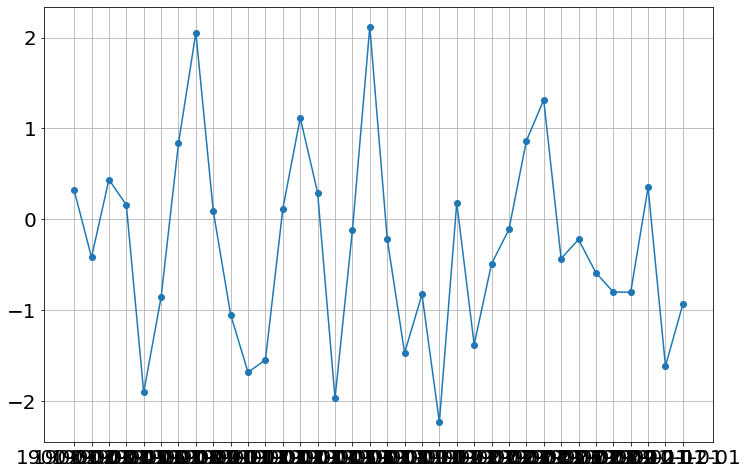

In [62]:
x=df['dates']
y=df['values']
plot(x,y,'-o')

In [63]:
def date_to_float(d):
    
    from dateutil import parser
    import datetime  
    from numpy import array
    
    try:
        dt=parser.parse(d)
        year=dt.year
        f=year+(dt-datetime.datetime(year, 1, 1, 0, 0))/(datetime.datetime(year+1, 1, 1, 0, 0)-datetime.datetime(year, 1, 1, 0, 0))

        return f
    except TypeError:
        f=[date_to_float(_) for _ in array(d)]
        return array(f)


In [64]:
x=date_to_float(df['dates'])

In [65]:
x[:5]

array([1900.        , 1900.08493151, 1900.16164384, 1900.24657534,
       1900.32876712])

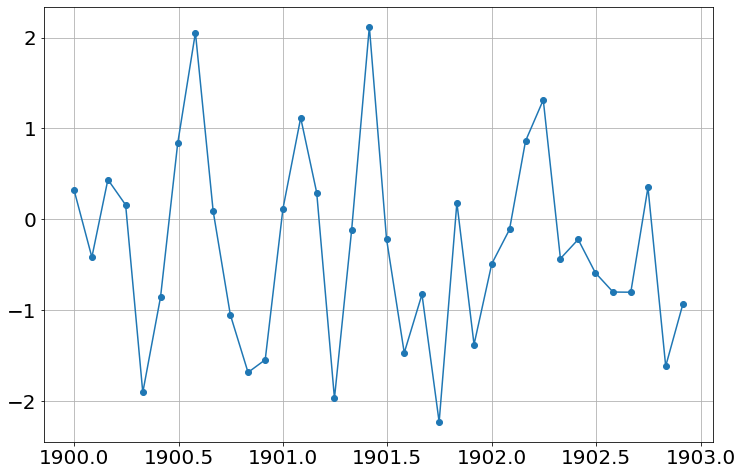

In [66]:
plot(x,y,'-o')

## putting it together

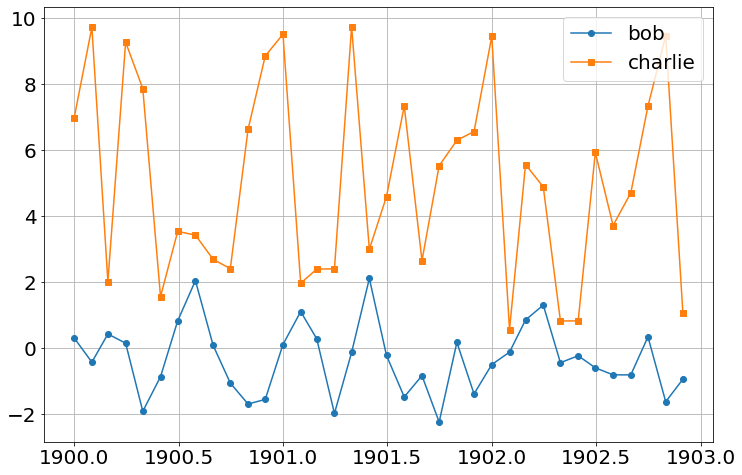

In [68]:
x=date_to_float(df_bob['dates'])
y=df_bob['values']
plot(x,y,'-o',label='bob')

x=date_to_float(df_charlie['dates'])
y=df_charlie['values']
plot(x,y,'-s',label='charlie')

legend()

## inverting the axis

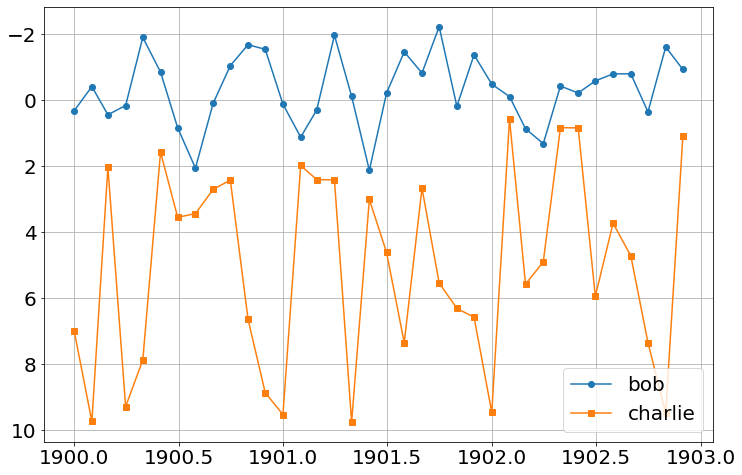

In [71]:
x=date_to_float(df_bob['dates'])
y=df_bob['values']
plot(x,y,'-o',label='bob')

x=date_to_float(df_charlie['dates'])
y=df_charlie['values']
plot(x,y,'-s',label='charlie')

legend()

gca().invert_yaxis()